# Question 2

In this question we will:
- Implement the vector median filter for colour images.
- Apply the vector median filter to a small dataset and establish a baseline performance meteric.
- Try to design a denoising pipeline that outperforms using only the vector median filter.   

# Step 1: Implement the vector median filter for colour images.

## Instructions

- Write a function that implements the vector median filter.  Details on the vector median filter can be found in Topic 4 of the lecture notes and implementation suggestions can be found in Section 2 of the asignment PDF.  
- The parameters to your function should be the input image `I`, and the `radius` of the square neighbourhood, e.g. radius 1 = 3x3 filter, radius 2 = 5x5 filter, etc.
- Your function should accept images of dtype `uint8` or `float64` (other types may be rejected if you wish).    It is easiest if you work with the image as data type `float64`.   If the input image is of type `uint8`, it is suggested that you convert it to dtype `float64`, construct the output image also as type `float64` and then convert it back to `uint8` before returning it.  In any case, the output image returned should be the same dtype as the input image.

In [42]:
import numpy as np
import pandas as pd
import skimage.io as skio

def vector_median_filter(I, radius):
    # Write the code for this step here
    # Ensure the image is in float64 format for computation
    if I.dtype == np.uint8:
        I = np.float64(I)
    
    # Dimensions of the image
    M, N, C = I.shape

    # Output image
    output = np.zeros_like(I)

    for x in range(M):
        for y in range(N):
            # Extracting the neighbourhood
            Iwindow = I[max(0, x-radius):min(M, x+radius+1), max(0, y-radius):min(N, y+radius+1), :]
            n = Iwindow.shape[0]*Iwindow.shape[1]
            colours = np.reshape(Iwindow, [n,3])
            # Constructing Y
            Y = np.tile(colours[:,:,np.newaxis], (1, 1, n))

            # Constructing X
            X = np.transpose(Y, (2, 1, 0))

            # Computing the sum of Manhattan distances
            D = np.sum(np.abs(X - Y), axis=(1, 2))
            
            # Finding the index of the minimum value in D
            k = np.argmin(D)

            # Assigning the median color to the output image
            output[x, y] = Y[k, :, 0]

    # Convert output image back to uint8 if original was uint8
    if I.dtype == np.uint8:
        return np.uint8(output)
    return output





# Step 2a: Establish a Baseline

## Instructions

- Determine the PSNR and SSIM of all of the noisy images by comparing them to their noiseless versions -- store these in a list.  
    - Use the same method to read the images files as in question 1, but read them from the `images/noisy` directory and the `images/noiseless` directory as needed.
- Filter each noisy image with a 3x3 vector median filter and compute the PSNR and SSIM of all of the filtered noisy images (by comparing them to the noiseless images) -- store these in a list.   
    - As with question 1, to save time we recommend you develop and debug your programs using only the first three to five images in file_list, and run it on the complete list when you're done. 
- The noiseless images are provided so you can compute PSNR and SSIM.  See functions `skmetrics.peak_signal_noise_ratio()` and `skmetrics.structural_similarity()`.  You'll need the `channel_axis=2` argument for `structural_similarity()`.  This indicates to the function that the it is the 3rd dimension of the 3D arrays that index the R, G and B channels.

_Hint: This step requires doing a few seemingly different things, but it's actually easier to do them all at once in the same loop._



In [44]:
# Some modules you might need.

import skimage.io as io
import os as os
import skimage.filters as skfilt
import skimage.metrics as skmetrics
import skimage.util as skutil
import numpy as np
import pandas as pd

%matplotlib inline

# Use pandas to read the image filenames and then create a list of the filenames called file_list, just like you did in question 1.
file = pd.read_csv('images.csv', header = None)
file_list = file[0].tolist()
filename = file_list[1]

path_noisy = 'Downloads/images/noisy'
path_noiseless = 'Downloads/images/noiseless'

psnr_noisy_values = []
ssim_noisy_values = []

psnr_filtered_values = []
ssim_filtered_values = []

for filename in file_list:   # you can restrict this to, for example,  file_list[0:3], for testing

    # Process the noisy image file here.  The images have the same filenames name in the 
    # noisy, noisy-test, and noiseless folders.  You'll have to construct the paths to these
    # images yourself.  This is easy to do using using os.path.join().
    
    noisy_img_path = os.path.join(path_noisy, filename)
    noiseless_img_path = os.path.join(path_noiseless, filename)
    
    # Reading images
    noisy_image = skutil.img_as_float(io.imread(noisy_img_path))
    noiseless_image = skutil.img_as_float(io.imread(noiseless_img_path))
    
    # Compute PSNR and SSIM for noisy images
    psnr_noisy = skmetrics.peak_signal_noise_ratio(noiseless_image, noisy_image)
    ssim_noisy = skmetrics.structural_similarity(noiseless_image, noisy_image, multichannel=True, channel_axis=2)

    psnr_noisy_values.append(psnr_noisy)
    ssim_noisy_values.append(ssim_noisy)

    # Filter the noisy image
    filtered_image = vector_median_filter(noisy_image, radius=1)

    # Compute PSNR and SSIM for filtered images
    psnr_filtered = skmetrics.peak_signal_noise_ratio(noiseless_image, filtered_image)
    ssim_filtered = skmetrics.structural_similarity(noiseless_image, filtered_image, multichannel=True, channel_axis=2)

    psnr_filtered_values.append(psnr_filtered)
    ssim_filtered_values.append(ssim_filtered)

print("PSNR for noisy images:", psnr_noisy_values)
print("SSIM for noisy images:", ssim_noisy_values)

print("PSNR for filtered images:", psnr_filtered_values)
print("SSIM for filtered images:", ssim_filtered_values)

C:\Users\PHAM XUAN TUAN ANH\AppData\Local\Temp\ipykernel_46748\1052323119.py:43: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_noisy = skmetrics.structural_similarity(noiseless_image, noisy_image, multichannel=True, channel_axis=2)
C:\Users\PHAM XUAN TUAN ANH\AppData\Local\Temp\ipykernel_46748\1052323119.py:53: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_filtered = skmetrics.structural_similarity(noiseless_image, filtered_image, multichannel=True, channel_axis=2)


PSNR for noisy images: [19.336508510572344, 20.935314536670294, 20.105296679694238, 19.650410393962005, 19.464087467923473, 21.887636735717866, 19.196902050252888, 19.81768689549098, 18.038586598620967, 20.16419638683436, 17.998391218300295, 22.910998624602676, 21.3061640463812, 18.430393641064803, 22.097799718451764, 22.668918885356856, 22.758421200783303, 18.947310345563075, 21.586744132825185, 20.229698501007583, 19.032514066786174, 17.878448258515796, 18.08616384500994, 21.524151044670635, 21.63570859640613, 18.880410611925996, 19.31507662541789, 20.31301781096472, 20.19723386062725, 20.698684676995015, 21.67729014747449, 18.680725713105232, 19.555367470601194, 20.104423784711475, 19.86487798092625, 19.226222829012052, 18.581692875151855, 20.33334369993039, 20.723530116678756, 22.213393337193835, 23.471757843934064, 18.323863258434525, 18.83533628461497, 20.148494024492166, 18.339613501671323, 20.441383648037878, 20.31746888049472, 18.730787350999663, 21.10550834390399, 19.47615699

# Step 2b: Compute average baseline metrics.

## Instructions

Compute the average PSNR and SSIM for the unfiltered noisy images (take the PSNR and SSIM measures for each image and average them).  Do the same for the median-filtered noisy images.  Plot a bar graph showing the two mean PSNR values and another showing the two mean SSIM values before and after filtering (see assignment description for sample output).

<Figure size 640x480 with 0 Axes>

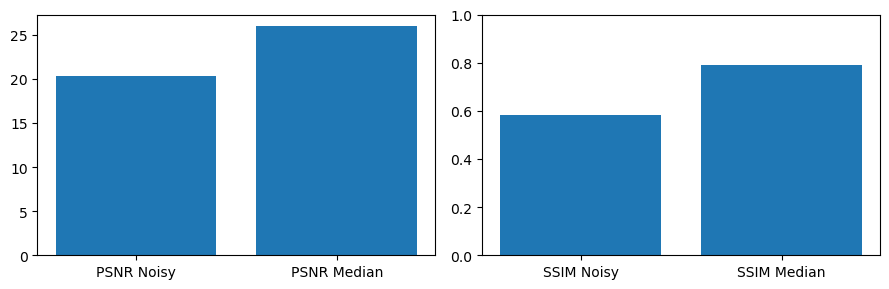

In [54]:
# some modules you might need.

import matplotlib.pyplot as plt
import numpy as np

# Compute average PSNR and SSIM for noisy images and median filtered noisy images
avg_psnr_noisy = np.mean(psnr_noisy_values)
avg_ssim_noisy = np.mean(ssim_noisy_values)

avg_psnr_filtered = np.mean(psnr_filtered_values)
avg_ssim_filtered = np.mean(ssim_filtered_values)

#Plot the bar graphs
myfigure = plt.figure()
plt.subplots(1,2, figsize = (9,3))

plt.subplot(1,2,1)
plt.bar(["PSNR Noisy","PSNR Median"],[avg_psnr_noisy,avg_psnr_filtered])

plt.subplot(1,2,2)
plt.bar(["SSIM Noisy","SSIM Median"],[avg_ssim_noisy,avg_ssim_filtered])
plt.ylim(0,1)
plt.tight_layout()

# Step 3:  See if you can do better!

Find a better way to denoise the images.  Compute the mean PSNR and SSIM for your denoising method.   Replot the graphs in the previous step with the new results added.

_You can use any functions in the python libraries to help you (numpy, scipy, skimage, etc.) but you cannot bring in code from external sources._


C:\Users\PHAM XUAN TUAN ANH\AppData\Local\Temp\ipykernel_46748\4088058523.py:18: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_tv_denoised = skmetrics.structural_similarity(noiseless_image, tv_denoised_img, multichannel=True, channel_axis=2)


Average PSNR for TVM: 26.07184246422129
Average PSNR for VMF: 25.986741793025622
Average SSIM for TVM: 0.8669349999029041
Average SSIM for VMF: 0.7901853685771367


<Figure size 640x480 with 0 Axes>

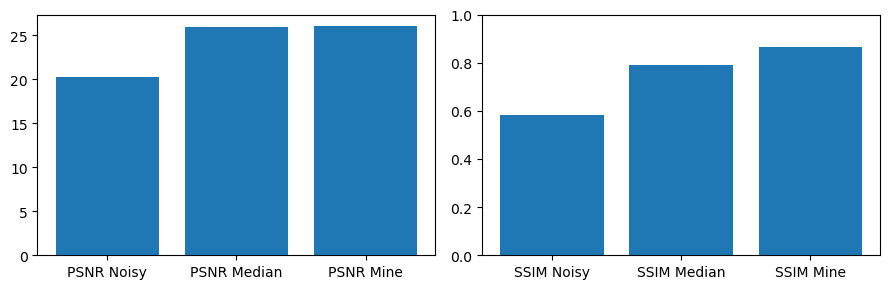

In [92]:
# Write your de-noising method here.
import skimage.restoration as skrest

for filename in file_list:
    
        noisy_img_path = os.path.join(path_noisy, filename)
        noiseless_img_path = os.path.join(path_noiseless, filename)
    
        # Reading images
        noisy_image = skutil.img_as_float(io.imread(noisy_img_path))
        noiseless_image = skutil.img_as_float(io.imread(noiseless_img_path))
    
        # Denoise using TVM
        tv_denoised_img = skrest.denoise_tv_bregman(noisy_image, weight=7, channel_axis = 2)
    
        # Compute PSNR and SSIM for TVM denoised images
        psnr_tv_denoised = skmetrics.peak_signal_noise_ratio(noiseless_image, tv_denoised_img)
        ssim_tv_denoised = skmetrics.structural_similarity(noiseless_image, tv_denoised_img, multichannel=True, channel_axis=2)
    
# Compute Average PSNR and SSIM for TVM denoised images
avg_psnr_tv_denoised = np.mean(psnr_tv_denoised)
avg_ssim_tv_denoised = np.mean(ssim_tv_denoised)

print("Average PSNR for TVM:",avg_psnr_tv_denoised)
print("Average PSNR for VMF:",avg_psnr_filtered)

print("Average SSIM for TVM:",avg_ssim_tv_denoised)
print("Average SSIM for VMF:",avg_ssim_filtered)

# Plot the bar graphs
myfigure2 = plt.figure()
plt.subplots(1,2, figsize = (9,3))

plt.subplot(1,2,1)
plt.bar(["PSNR Noisy","PSNR Median","PSNR Mine"],[avg_psnr_noisy,avg_psnr_filtered,avg_psnr_tv_denoised])

plt.subplot(1,2,2)
plt.bar(["SSIM Noisy","SSIM Median","SSIM Mine"],[avg_ssim_noisy,avg_ssim_filtered,avg_ssim_tv_denoised])
plt.ylim(0,1)

plt.tight_layout()